Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.58417743..3.0007799].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.615827..3.0167427].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.57353747..2.9846778].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5283145..3.028034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5964088..3.0015821].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60460037..2.9612715].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.50134

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])
torch.Size([16, 3, 28, 28]) torch.Size([16, 3, 14, 14]) torch.Size([16, 3, 28, 28])
tensor([ 0.0413,  0.0007,  0.1112,  0.0109, -0.0105,  0.0226, -0.0485, -0.0230,
        -0.0148,  0.0046, -0.0513,  0.0563,  0.0110, -0.0235, -0.0082,  0.0144],
       device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.0652, 0.9241, 1.0649, 0.8477, 1.0078, 1.0727, 0.7146, 0.9135, 0.6596,
        1.0503, 0.8805, 1.2714, 0.9267, 0.9933, 0.6129, 1.0440],
       device='cuda:0', grad_fn=<StdBackward0>)


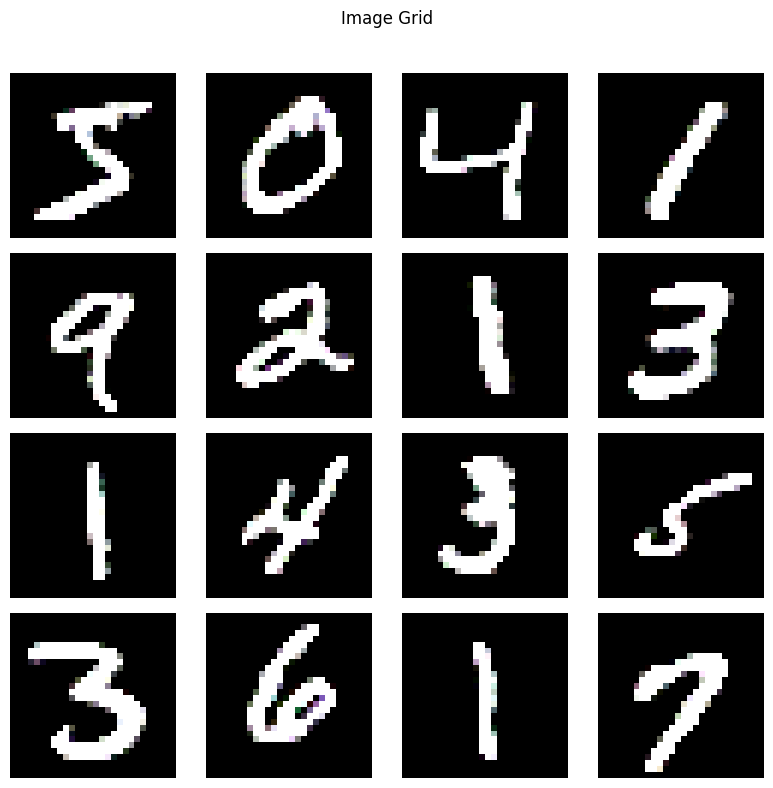

In [2]:
import torch 
from utils import plot_image_grid, plot_tensor_matrix

mnist_tensor3 = torch.load("data/mnist_tensor3.pth")
mnist_labels = torch.load("data/mnist_labels.pth")
enc = torch.load("model_collection/enczmuv.pth", weights_only=False)
dec = torch.load("model_collection/deczmuv.pth", weights_only=False)
enc.eval(), dec.eval()

bs = 16
X = mnist_tensor3[:bs].cuda()
z = enc(X)
Y = dec(z)

print(mnist_labels[:bs])
print(X.shape, z.shape, Y.shape)
print(z.mean(dim=(1, 2, 3)))
print(z.std(dim=(1, 2, 3)))
plot_image_grid(Y)


[0.999, 0.9978044096385542, 0.9964138950596603] [0.001691966855659895, 0.0016077014702099417, 0.0015273163966994445] 0.0015273163966994445 250


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.57840765..2.9934747].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5911043..3.063112].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60591316..3.178474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6451431..3.2504058].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6752086..3.290203].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6966876..3.314393].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7147051.

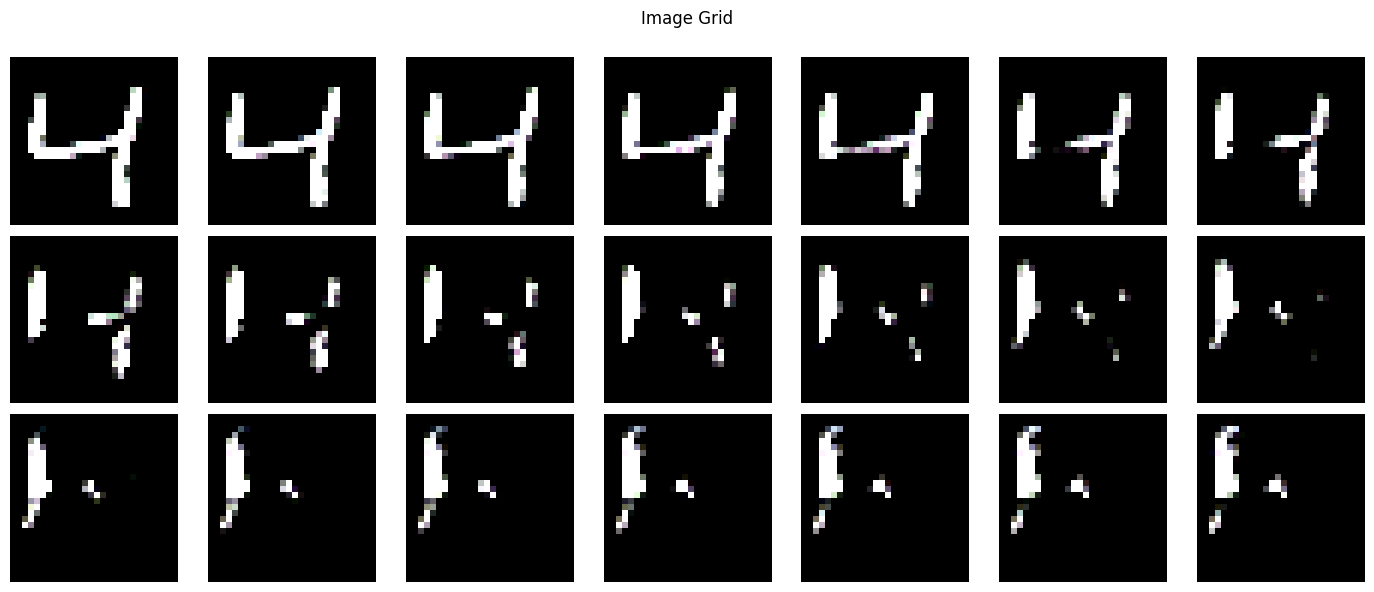

In [3]:
from utils import generate_alpha_bar
import math

T = 250 
beta_0 = 0.001
beta_T = 0.05

a_bar = generate_alpha_bar(beta_0, beta_T, T)
print(a_bar[:3], a_bar[-3:], a_bar[-1], len(a_bar))

demo = mnist_tensor3[2].unsqueeze(0).repeat(T, 1, 1, 1).cuda()
z = enc(demo)
noise = torch.randn_like(z[0])

for i in range(T): 
    z_corrupted = math.sqrt(a_bar[i]) * z[0] + math.sqrt(1-a_bar[i]) * noise
    z[i] = z_corrupted

z[T-1] = noise

output = dec(z)
plot_image_grid(output[::12])

Dataset Maker

In [ ]:
from tqdm import tqdm

z_set = []
n_set = []
t_set = []
l_set = []

N = 10000

def random_integer(mi, ma): 
    return torch.randint(mi,ma,(1,))[0].item()

for i in tqdm(range(N)): 
    time = random_integer(0,T)

    idx = random_integer(0,mnist_tensor3.shape[0])
    x = mnist_tensor3[idx].cuda()
    label = mnist_labels[idx]
    z = enc(x)
    noise = torch.randn_like(z)
    z_corrupted = math.sqrt(a_bar[time]) * z + math.sqrt(1-a_bar[time]) * noise

    z_set.append(z_corrupted.cpu().unsqueeze(0))
    n_set.append(noise.cpu().unsqueeze(0))
    t_set.append(torch.tensor([time]))
    l_set.append(torch.tensor([label]))

z_set, n_set, t_set, l_set = torch.concat(z_set), torch.concat(n_set), torch.concat(t_set), torch.concat(l_set)
print(z_set.shape, n_set.shape, t_set.shape)

torch.save(z_set, "training_set/z_set.pth")
torch.save(n_set, "training_set/n_set.pth")
torch.save(t_set, "training_set/t_set.pth")

  9%|▉         | 898/10000 [00:08<01:26, 105.11it/s]


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.76821053..3.407423].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5671863..3.0158353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71699077..2.7250185].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.585601..3.126772].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.59467953..3.0143774].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6249616..3.274137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5496838

torch.Size([100000, 3, 14, 14]) torch.Size([100000, 3, 14, 14]) torch.Size([100000])
tensor([[196,   1, 239,   5],
        [ 85, 121, 200,  18],
        [202, 246, 203,  49],
        [180, 239, 197,  17]])
tensor([[1, 9, 2, 3],
        [1, 4, 4, 4],
        [2, 6, 6, 0],
        [6, 1, 7, 9]])


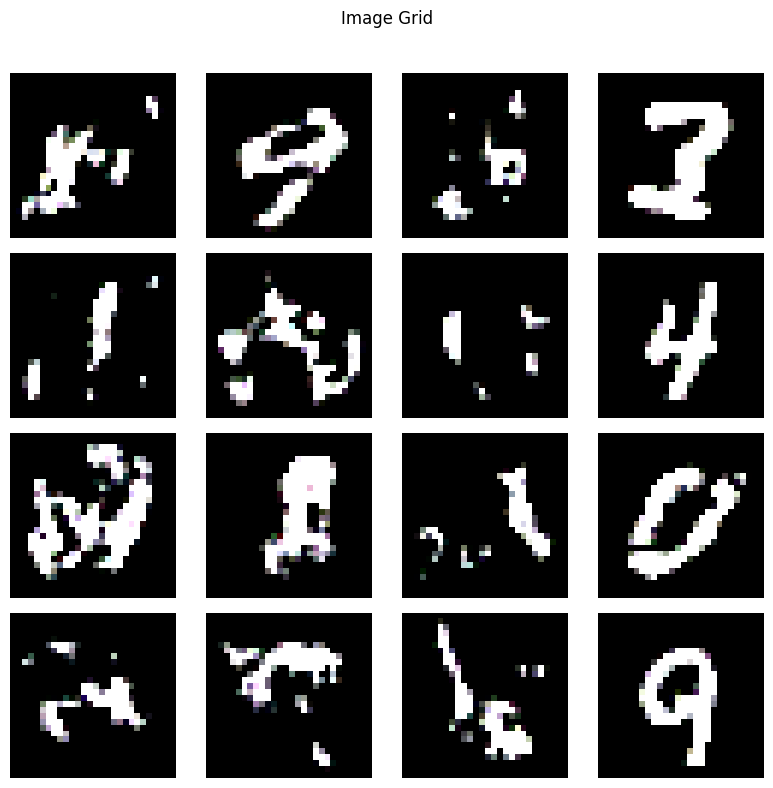

: 

In [ ]:
z_set = torch.load("training_set/z_set.pth")
n_set = torch.load("training_set/n_set.pth")
t_set = torch.load("training_set/t_set.pth")
l_set = torch.load("training_set/l_set.pth")
print(z_set.shape, n_set.shape, t_set.shape)


bs = 16
o = 20
t_subset = t_set[o:o+bs]
z_subset = z_set[o:o+bs]
l_subset = l_set[o:o+bs]
print(t_subset.view(int(bs**0.5),int(bs**0.5)))
print(l_subset.view(int(bs**0.5),int(bs**0.5)))

x_subset = dec(z_subset.cuda())
plot_image_grid(x_subset)